In [2]:
#A real estate company wants to build homes at different locations in Boston.
#They have data for historical prices but haven’t decided the actual prices yet. 
#They want to price it so that it is affordable to the general public.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
boston= load_boston()
boston.keys()
boston.feature_names
boston.target

print(boston.DESCR)
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['MEDV'] = boston.target
df.shape


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

(506, 14)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
#pip install -U scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\sharv\\anaconda3\\lib\\site-packages\\~klearn\\datasets\\_svmlight_format_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
from sklearn.model_selection import train_test_split

x_train= df.drop(['MEDV'], axis=1)
y_train= df['MEDV']
xtrain,xtest,ytrain,ytest= train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [54]:
#conda install scikit-learn=0.23.0

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - scikit-learn=0.23.0

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [6]:
# model building
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs= -1)
model.fit(xtrain,ytrain)
print(model.intercept_)
print(model.coef_)
print(df.columns.values.tolist())
list(zip(df.columns,model.coef_))

31.63108403569186
[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


[('CRIM', -0.13347010285294725),
 ('ZN', 0.03580891359323623),
 ('INDUS', 0.049522645220052244),
 ('CHAS', 3.119835116285423),
 ('NOX', -15.417060895306776),
 ('RM', 4.057199231645376),
 ('AGE', -0.010820835184924181),
 ('DIS', -1.3859982431608782),
 ('RAD', 0.24272733982225161),
 ('TAX', -0.008702234365661957),
 ('PTRATIO', -0.9106852081102905),
 ('B', 0.011794115892575245),
 ('LSTAT', -0.5471133128239536)]

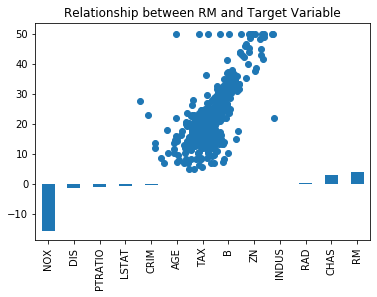

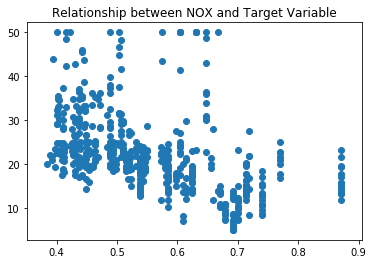

R2 Value/Coefficient of Determination: 0.7112260057484903


In [9]:
# checking magnitude of coefficients
predictors = df.columns[:-1]
coef= pd.Series(model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')
plt.scatter(df.RM,df.MEDV)
plt.title("Relationship between RM and Target Variable")
plt.show()
plt.scatter(df.NOX,df.MEDV)
plt.title("Relationship between NOX and Target Variable")
plt.show()
print('R2 Value/Coefficient of Determination: {}'.format(model.score(xtest, ytest)))

4.748208239685937
4.6386899261728445


,Actual,Predicted
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


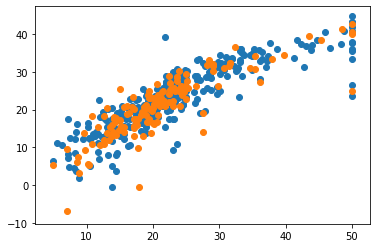

In [13]:
# final prediction
import math
from sklearn.metrics import r2_score,mean_squared_error
plt.scatter(ytrain,model.predict(xtrain))
print(math.sqrt(mean_squared_error(ytrain, model.predict(xtrain))))
plt.scatter(ytest,model.predict(xtest))
print(math.sqrt(mean_squared_error(ytest, model.predict(xtest))))
pd.DataFrame({'Actual': ytest, 'Predicted': model.predict(xtest)}).head(10)

In [14]:
#Problem Statement: For the Boston dataset used earlier, the team also wants to cross-reference results using regularization techniques
#Objective:
#•Build a predictive model using Ridge, Lasso and ElasticNet
#•Compare the models basis on accuracy

In [18]:
from sklearn.linear_model import Ridge
import math
ridgeReg= Ridge(alpha=0.001, normalize=True)
ridgeReg.fit(xtrain,ytrain)
print(math.sqrt(mean_squared_error(ytrain, ridgeReg.predict(xtrain))))
print(math.sqrt(mean_squared_error(ytest, ridgeReg.predict(xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(xtest, ytest)))

4.7482291677126485
4.639881960030266
R2 Value/Coefficient of Determination: 0.711077570473421


In [25]:
from sklearn.linear_model import Lasso
import math
lassoreg= Lasso(alpha=0.001, normalize=True)
lassoreg.fit(xtrain,ytrain)
print(math.sqrt(mean_squared_error(ytrain, lassoreg.predict(xtrain))))
print(math.sqrt(mean_squared_error(ytest, lassoreg.predict(xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(xtest, ytest)))

4.75090045246006
4.650355164208201
R2 Value/Coefficient of Determination: 0.7097717791957663


In [28]:
from sklearn.linear_model import ElasticNet
import math
Elastic = ElasticNet(alpha=0.001, normalize=True)
Elastic.fit(xtrain,ytrain)
print(math.sqrt(mean_squared_error(ytrain, Elastic.predict(xtrain))))
print(math.sqrt(mean_squared_error(ytest, Elastic.predict(xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(Elastic.score(xtest, ytest)))

4.889469204050735
4.790286847734995
R2 Value/Coefficient of Determination: 0.6920427488791855
